### 1.7 첫 번째 애플리케이션: 붓꽃의 품종 분류

#### 1.7.1 데이터 적재

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))

Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [3]:
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [15]:
print(iris_dataset['data'].shape)
#print(iris_dataset.data)
print(iris_dataset.target.shape)
print(iris_dataset.target)  #각 붓꽃의 종류 50개씩을 labeling

print(iris_dataset.data[0])
print(iris_dataset.target[0])
print(iris_dataset.target_names[0])

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[ 5.1  3.5  1.4  0.2]
0
setosa


#### 1.7.2 성과 측정: 훈련 데이터와 테스트 데이터

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset.data, 
    iris_dataset.target,
    #test_size=38,
    random_state=0
)

In [18]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [19]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


#### 1.7.3 가장 먼저 할 일: 데이터 살펴보기

In [21]:
print(iris_dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c11d39358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c171c9550>]], dtype=object)

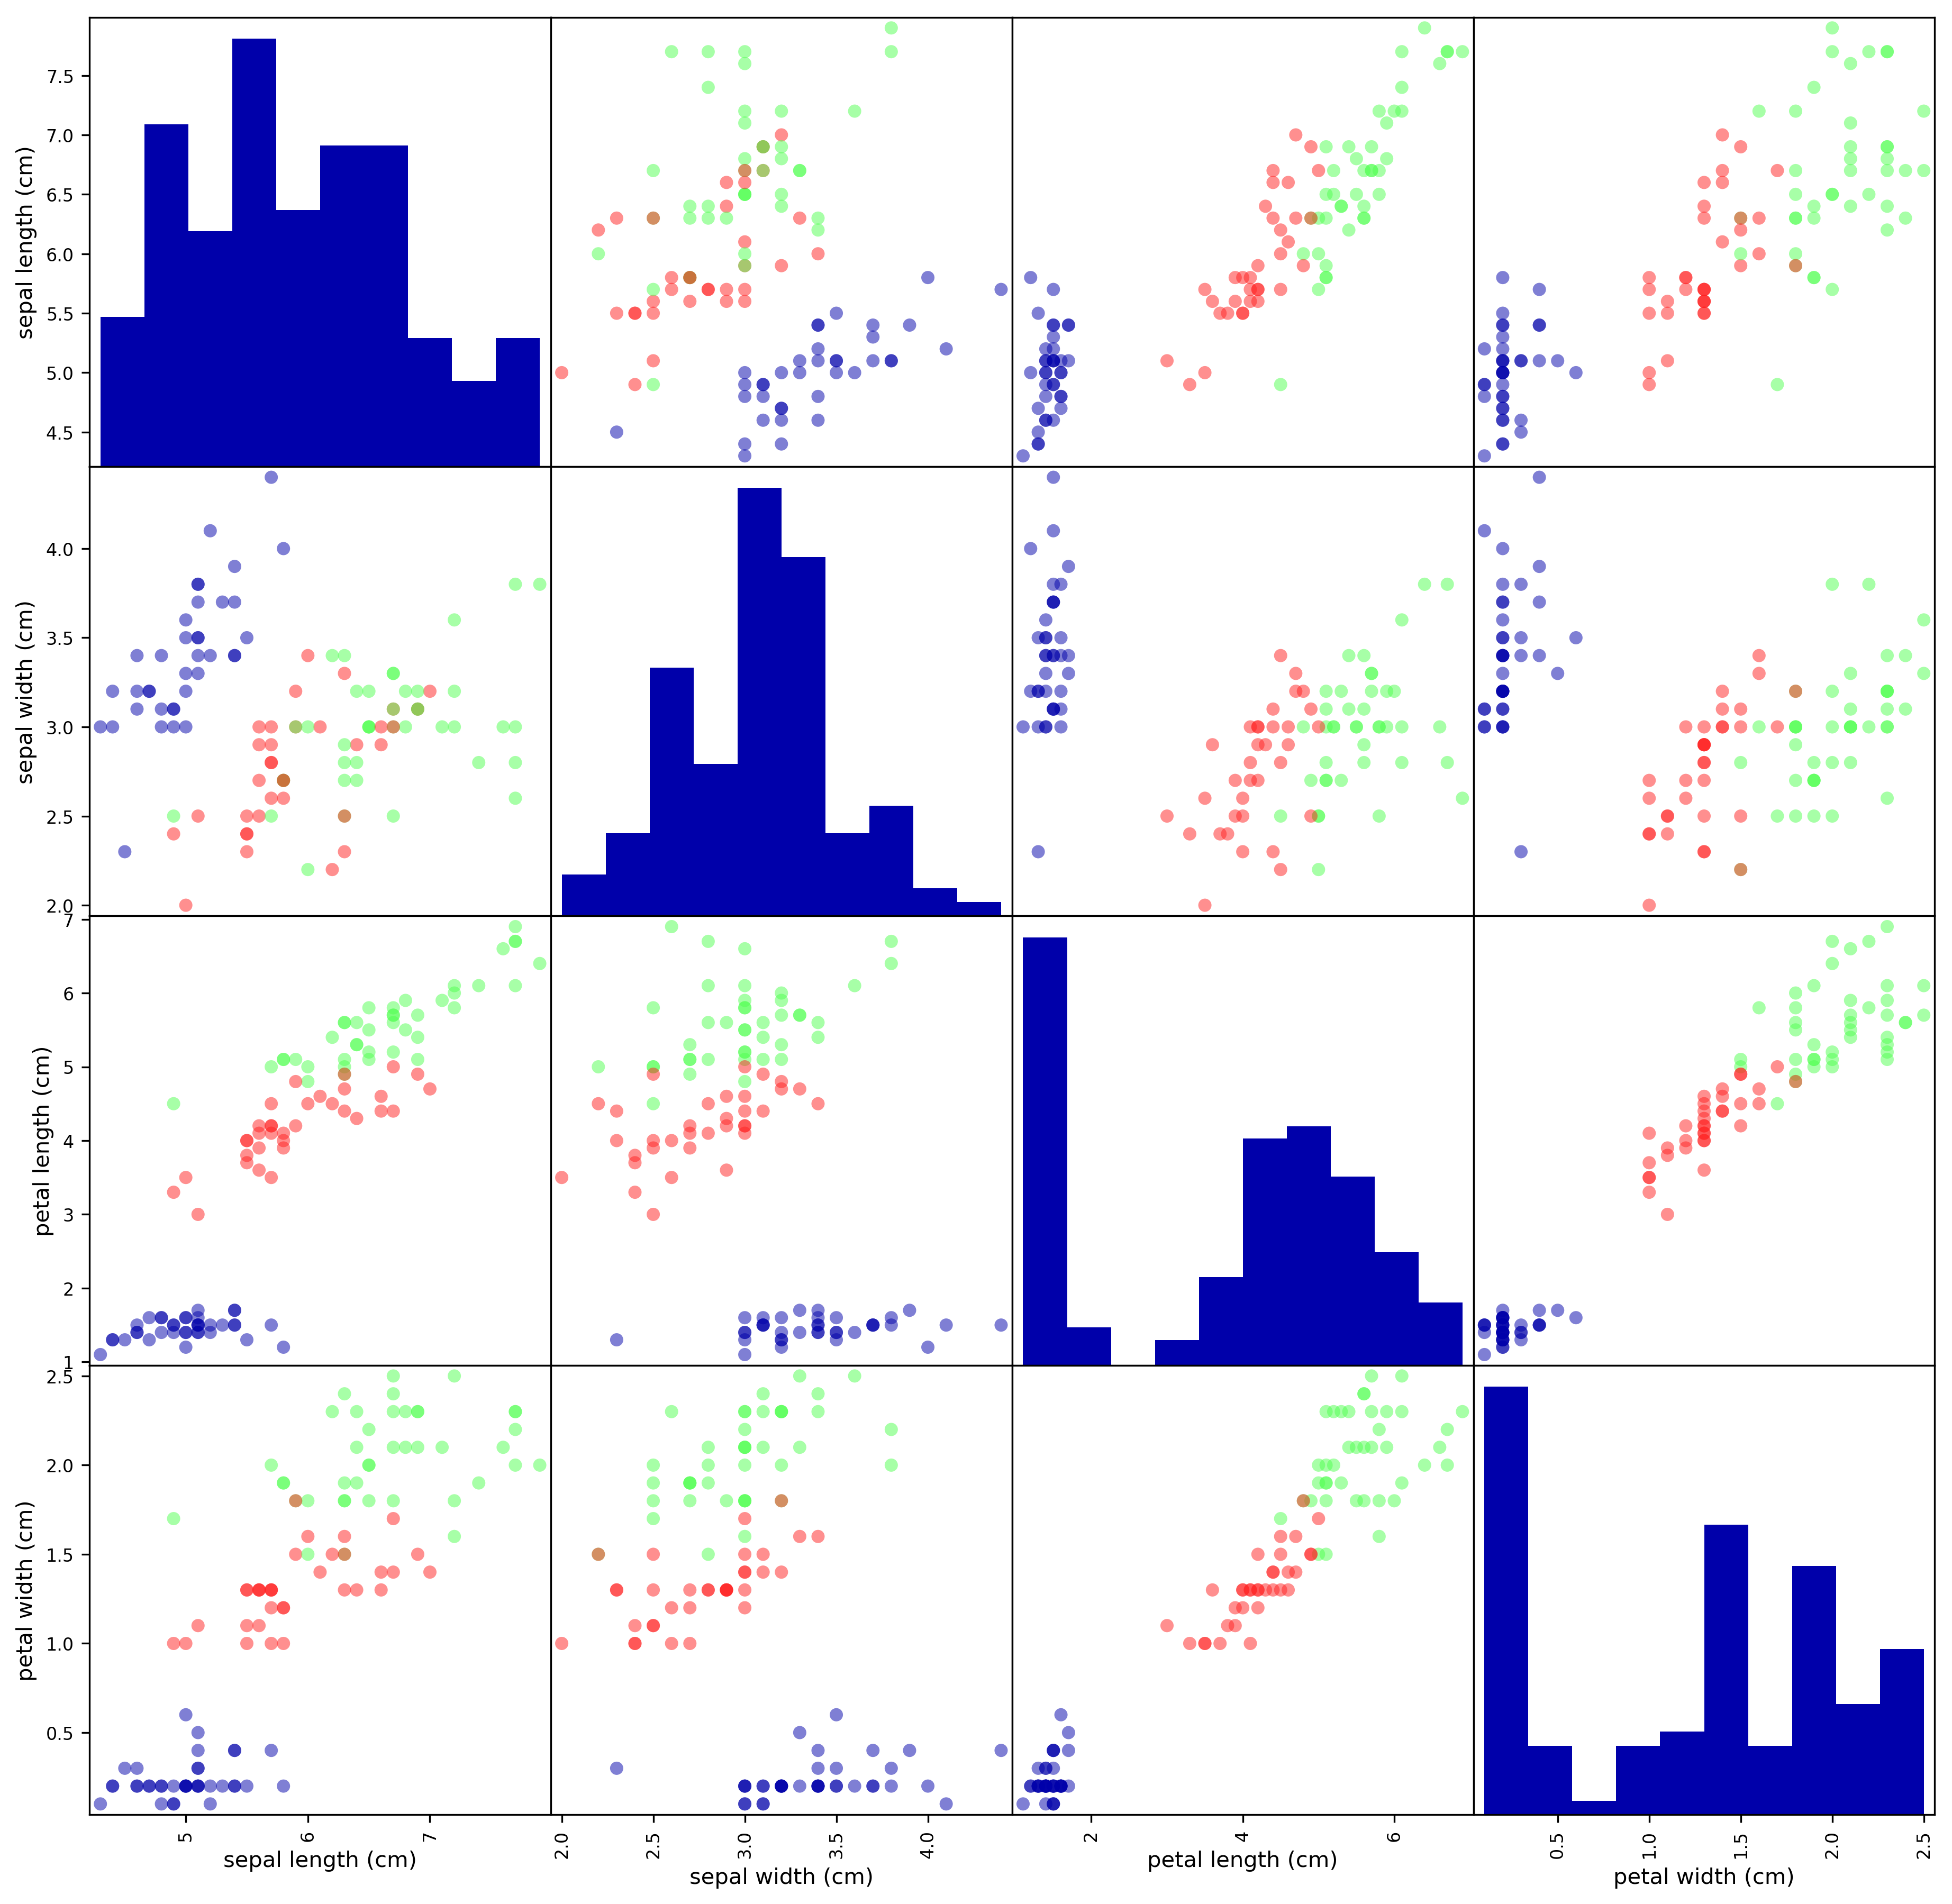

In [25]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *
import pandas as pd
import mglearn

# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(
    iris_dataframe, 
    c=y_train, 
    figsize=(15, 15), 
    marker='o',
    cmap=mglearn.cm3
)

#### 1.7.4 첫 번째 머신러닝 모델: k-최근접 이웃 알고리즘 

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

#### 1.7.5 예측하기 

In [32]:
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [33]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]
))

Prediction: [0]
Predicted target name: ['setosa']


#### 1.7.6 모델 평가하기

In [34]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [35]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
Test set score: 0.97
